# **Data Ingestion**

From public facebook software development requirements

In [ ]:
# Importing Libraries
import requests
import pandas as pd
from datetime import datetime

# === GitHub Token ===
GITHUB_TOKEN = "your_token"

# === Headers for Authentication ===
headers = {
    "Authorization": f"Bearer {GITHUB_TOKEN}",
    "Content-Type": "application/json"
}

# === GitHub GraphQL Endpoint ===
url = "https://api.github.com/graphql"

# === GraphQL Query Template for Facebook React Issues ===
query_template = """
{
  repository(owner: "facebook", name: "react") {
    issues(first: 100, after: %s, orderBy: {field: CREATED_AT, direction: ASC}) {
      pageInfo {
        endCursor
        hasNextPage
      }
      nodes {
        number
        title
        body
        state
        createdAt
        updatedAt
        url
        comments {
          totalCount
        }
      }
    }
  }
}
"""

# === Initialization ===
has_next_page = True                        # Controls the pagination loop
end_cursor = "null"                         # Cursor to track pagination
all_issues = []                             # Store all fetched issues
iteration = 0                               # Loop counter
max_issues = 50000000                       # Cap to avoid hitting limits
cutoff_date = datetime(2024, 6, 16)         # Stop fetching issues beyond this date

# === Start Fetching Issues ===
while has_next_page and len(all_issues) < max_issues:
    print(f"Fetching batch {iteration + 1}...")

    # Format cursor for GraphQL
    cursor = f'"{end_cursor}"' if end_cursor != "null" else "null"
    query = query_template % cursor

    # Send POST request to GitHub API
    response = requests.post(url, headers=headers, json={"query": query})
    result = response.json()

    # Parse results
    issues_data = result["data"]["repository"]["issues"]
    page_info = issues_data["pageInfo"]
    nodes = issues_data["nodes"]

    # Process each issue in the batch
    for issue in nodes:
        created_at = datetime.fromisoformat(issue["createdAt"].replace("Z", ""))

        # Check if issue was created on or after cutoff date
        if created_at >= cutoff_date:
            print("⛔ Reached cutoff date (June 16, 2024). Halting further fetch.")
            has_next_page = False
            break

        # Append cleaned issue data
        all_issues.append({
            "id": issue["number"],
            "title": issue["title"],
            "body": issue["body"],
            "state": issue["state"],
            "created_at": issue["createdAt"],
            "updated_at": issue["updatedAt"],
            "url": issue["url"],
            "comments": issue["comments"]["totalCount"],
            "source": "facebook"
        })

    # Pagination update
    has_next_page = page_info["hasNextPage"]
    end_cursor = page_info["endCursor"]
    iteration += 1

# === Final Output ===
print(f"✅ Fetched {len(all_issues)} issues before cutoff date.")

# Convert to DataFrame
df_facebook = pd.DataFrame(all_issues)

print("✅ Data saved to facebook dataframe")

Fetching batch 1...
Fetching batch 2...
Fetching batch 3...
Fetching batch 4...
Fetching batch 5...
Fetching batch 6...
Fetching batch 7...
Fetching batch 8...
Fetching batch 9...
Fetching batch 10...
Fetching batch 11...
Fetching batch 12...
Fetching batch 13...
Fetching batch 14...
Fetching batch 15...
Fetching batch 16...
Fetching batch 17...
Fetching batch 18...
Fetching batch 19...
Fetching batch 20...
Fetching batch 21...
Fetching batch 22...
Fetching batch 23...
Fetching batch 24...
Fetching batch 25...
Fetching batch 26...
Fetching batch 27...
Fetching batch 28...
Fetching batch 29...
Fetching batch 30...
Fetching batch 31...
Fetching batch 32...
Fetching batch 33...
Fetching batch 34...
Fetching batch 35...
Fetching batch 36...
Fetching batch 37...
Fetching batch 38...
Fetching batch 39...
Fetching batch 40...
Fetching batch 41...
Fetching batch 42...
Fetching batch 43...
Fetching batch 44...
Fetching batch 45...
Fetching batch 46...
Fetching batch 47...
Fetching batch 48...
F

From public Stripe software development requirements

In [ ]:
# === GitHub Token for Authentication ===
GITHUB_TOKEN = "your_token"

headers = {
    "Authorization": f"Bearer {GITHUB_TOKEN}",
    "Content-Type": "application/json"
}

# === GraphQL API Endpoint ===
url = "https://api.github.com/graphql"

# === GraphQL Query for Stripe Issues ===
query_template = """
{
  repository(owner: "stripe", name: "stripe-python") {
    issues(first: 100, after: %s, orderBy: {field: CREATED_AT, direction: ASC}) {
      pageInfo {
        endCursor
        hasNextPage
      }
      nodes {
        number
        title
        body
        state
        createdAt
        updatedAt
        url
        comments {
          totalCount
        }
      }
    }
  }
}
"""

# === Initialization ===
has_next_page = True                        # Pagination flag
end_cursor = "null"                         # Tracks pagination cursor
all_issues = []                             # Holds all collected issues
iteration = 0                               # Batch counter
max_issues = 50000000                       # Optional limit
cutoff_date = datetime(2024, 6, 16)         # Do not include issues after this date

# === Data Collection Loop ===
while has_next_page and len(all_issues) < max_issues:
    print(f"Fetching batch {iteration + 1}...")
    cursor = f'"{end_cursor}"' if end_cursor != "null" else "null"
    query = query_template % cursor

    # === Send POST Request ===
    response = requests.post(url, headers=headers, json={"query": query})
    result = response.json()

    # === Check for Errors ===
    if "errors" in result:
        print("❌ Error fetching data:")
        for error in result["errors"]:
            print(error)
        break

    # === Parse Issues Data ===
    if "data" in result and result["data"]["repository"] and result["data"]["repository"]["issues"]:
        issues_data = result["data"]["repository"]["issues"]
        page_info = issues_data["pageInfo"]
        nodes = issues_data["nodes"]

        for issue in nodes:
            created_at = datetime.fromisoformat(issue["createdAt"].replace("Z", ""))

            # Check if this issue is beyond the cutoff date
            if created_at >= cutoff_date:
                print("⛔ Reached cutoff date (June 16, 2024). Stopping further fetch.")
                has_next_page = False
                break

            # Add issue details
            all_issues.append({
                "id": issue["number"],
                "title": issue["title"],
                "body": issue["body"],
                "state": issue["state"],
                "created_at": issue["createdAt"],
                "updated_at": issue["updatedAt"],
                "url": issue["url"],
                "comments": issue["comments"]["totalCount"],
                "source": "stripe"
            })

        # Update for pagination
        has_next_page = page_info["hasNextPage"]
        end_cursor = page_info["endCursor"]
        iteration += 1
    else:
        print("⚠️ No data received.")
        break

# === Convert to DataFrame ===
df_stripe = pd.DataFrame(all_issues)

# Optional: Save to CSV
# df_stripe.to_csv("stripe_issues_before_cutoff.csv", index=False)

print(f"✅ Fetched {len(df_stripe)} issues.")
print("✅ Data saved to stripe dataframe.")

Fetching batch 1...
Fetching batch 2...
Fetching batch 3...
Fetching batch 4...
⛔ Reached cutoff date (June 16, 2024). Stopping further fetch.
✅ Fetched 365 issues.
✅ Data saved to stripe dataframe.


From public Paypal software development requirements

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# === GitHub Token for Authentication ===
GITHUB_TOKEN = "your_token"

headers = {
    "Authorization": f"Bearer {GITHUB_TOKEN}",
    "Content-Type": "application/json"
}

# === GitHub GraphQL API Endpoint ===
url = "https://api.github.com/graphql"

# === PayPal Repository GraphQL Query ===
query_template = """
{
  repository(owner: "paypal", name: "PayPal-PHP-SDK") {
    issues(first: 100, after: %s, orderBy: {field: CREATED_AT, direction: ASC}) {
      pageInfo {
        endCursor
        hasNextPage
      }
      nodes {
        number
        title
        body
        state
        createdAt
        updatedAt
        url
        comments {
          totalCount
        }
      }
    }
  }
}
"""

# === Setup and Initialization ===
has_next_page = True                        # Track pagination
end_cursor = "null"                         # Start cursor
all_issues = []                             # Store all issue data
iteration = 0                               # Batch iteration count
max_issues = 50000000                       # Optional limit
cutoff_date = datetime(2024, 6, 16)         # Stop if issue is after this date

# === Fetch Data Loop ===
while has_next_page and len(all_issues) < max_issues:
    print(f"Fetching batch {iteration + 1}...")
    cursor = f'"{end_cursor}"' if end_cursor != "null" else "null"
    query = query_template % cursor

    response = requests.post(url, headers=headers, json={"query": query})
    result = response.json()

    # === Handle API Errors ===
    if "errors" in result:
        print("❌ Error fetching data from GitHub API:")
        for error in result["errors"]:
            print(error)
        break

    # === Process Issues if Present ===
    if "data" in result and result["data"]["repository"] and result["data"]["repository"]["issues"]:
        issues_data = result["data"]["repository"]["issues"]
        page_info = issues_data["pageInfo"]
        nodes = issues_data["nodes"]

        for issue in nodes:
            created_at = datetime.fromisoformat(issue["createdAt"].replace("Z", ""))

            # Stop fetching if issue is after cutoff date
            if created_at >= cutoff_date:
                print("⛔ Reached cutoff date (June 16, 2024). Ending extraction.")
                has_next_page = False
                break

            # Store the issue details
            all_issues.append({
                "id": issue["number"],
                "title": issue["title"],
                "body": issue["body"],
                "state": issue["state"],
                "created_at": issue["createdAt"],
                "updated_at": issue["updatedAt"],
                "url": issue["url"],
                "comments": issue["comments"]["totalCount"],
                "source": "paypal"
            })

        # Prepare for next page
        has_next_page = page_info["hasNextPage"]
        end_cursor = page_info["endCursor"]
        iteration += 1
    else:
        print("⚠️ No data received from GitHub API.")
        break

# === Convert to DataFrame ===
df_paypal = pd.DataFrame(all_issues)

# Optional: Save to CSV
# df_paypal.to_csv("paypal_issues_cutoff.csv", index=False)

print(f"✅ Fetched {len(df_paypal)} PayPal issues.")
print("✅ Data saved to paypal dataframe.")

Fetching batch 1...
Fetching batch 2...
Fetching batch 3...
Fetching batch 4...
Fetching batch 5...
Fetching batch 6...
Fetching batch 7...
Fetching batch 8...
Fetching batch 9...
Fetching batch 10...
Fetching batch 11...
Fetching batch 12...
✅ Fetched 1185 PayPal issues.
✅ Data saved to paypal dataframe.


# **Data Cleaning and Preprocessing**

In [ ]:
df_paypal.head()

,id,title,body,state,created_at,updated_at,url,comments,source
0,2,I don't see where is \PPLoggingManager,I don't see where is \PPLoggingManager in /lib\n,CLOSED,2013-03-15T07:32:16Z,2013-03-18T01:18:35Z,https://github.com/paypal/PayPal-PHP-SDK/issues/2,1,paypal
1,4,Missing argument 2 for PPConnectionManager,I'm getting the following error:\n\n_Warning: ...,CLOSED,2013-03-27T21:38:36Z,2013-04-08T09:52:23Z,https://github.com/paypal/PayPal-PHP-SDK/issues/4,3,paypal
2,5,Recurring Profiles,Is the goal for the REST API to ultimately han...,CLOSED,2013-04-26T18:00:04Z,2013-09-02T09:53:36Z,https://github.com/paypal/PayPal-PHP-SDK/issues/5,1,paypal
3,6,"Missing note for ""PP_CONFIG_PATH"" in usage notice","Hi,\n\nThe constant for the config file seems ...",CLOSED,2013-04-29T15:46:43Z,2013-04-30T05:37:28Z,https://github.com/paypal/PayPal-PHP-SDK/issues/6,1,paypal
4,8,Permissions API,Is it possible to use the Permissions API with...,CLOSED,2013-05-27T14:07:38Z,2015-10-13T20:45:39Z,https://github.com/paypal/PayPal-PHP-SDK/issues/8,2,paypal


In [ ]:
df_facebook.head()

,id,title,body,state,created_at,updated_at,url,comments,source
0,10,Can't require() react-tools module,I'm trying to programatically invoke the JSX t...,CLOSED,2013-05-30T03:46:02Z,2013-05-30T18:55:49Z,https://github.com/facebook/react/issues/10,3,facebook
1,12,Write tests for react-tools module,"At the very very least, it should not be broke...",CLOSED,2013-05-30T04:32:10Z,2013-05-31T14:39:43Z,https://github.com/facebook/react/issues/12,0,facebook
2,16,must adding comments for JSX?,must added the following comments ?why?no anot...,CLOSED,2013-05-30T12:46:11Z,2013-07-21T17:08:03Z,https://github.com/facebook/react/issues/16,4,facebook
3,21,Small update to Bower command,It could be preferable to use:\n\n```\nbower i...,CLOSED,2013-05-30T16:01:55Z,2013-05-30T18:54:41Z,https://github.com/facebook/react/issues/21,1,facebook
4,24,"Fix docs Rake ""update_version"" command to stri...",Looks like it's mostly a problem with Ruby 1.8...,CLOSED,2013-05-30T18:09:21Z,2013-07-21T17:08:47Z,https://github.com/facebook/react/issues/24,1,facebook


In [ ]:
df_stripe.head()

,id,title,body,state,created_at,updated_at,url,comments,source
0,1,Example.py,"Perhaps it's just me, but there seems to be so...",CLOSED,2011-08-24T09:07:50Z,2011-08-29T19:41:31Z,https://github.com/stripe/stripe-python/issues/1,1,stripe
1,2,testing issue notifications,smee\n,CLOSED,2011-08-30T08:13:13Z,2011-09-14T06:00:12Z,https://github.com/stripe/stripe-python/issues/2,3,stripe
2,3,Please change your docs to support pip instead...,pip is /hasdeprecating the use of easy_install...,CLOSED,2011-09-14T03:35:44Z,2011-09-14T05:59:58Z,https://github.com/stripe/stripe-python/issues/3,1,stripe
3,5,Partial Refunds Don't Work,I tried making a partial refund by passing in ...,CLOSED,2011-10-20T23:54:56Z,2014-08-11T07:30:05Z,https://github.com/stripe/stripe-python/issues/5,2,stripe
4,6,Please update the CA bundle shipped with this ...,Please update the CA bundle shipped with this ...,CLOSED,2011-11-25T11:06:31Z,2011-11-26T06:35:51Z,https://github.com/stripe/stripe-python/issues/6,1,stripe


In [ ]:
#Print the shape of the file before cleaning steps
df_all = pd.concat([df_facebook, df_stripe, df_paypal], ignore_index=True)
print(df_all.shape)

(14540, 9)


In [ ]:
# Drop the id column
df_all = df_all.drop(columns=["id"])

# Drop empty or missing bodies
df_all = df_all.dropna(subset=["body"])
df_all = df_all[df_all["body"].str.strip() != ""]

# Remove duplicates
df_all = df_all.drop_duplicates(subset=["title", "body"])

# Remove placeholder text or spammy rows
df_all = df_all[~df_all["body"].str.contains("test|dummy", case=False, na=False)]

# Normalize text
df_all["body"] = df_all["body"].str.lower().str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
#Print the Shape of the file after cleaning steps
print(df_all.shape)

(10782, 8)


In [ ]:
df_all.head()

,title,body,state,created_at,updated_at,url,comments,source
0,Can't require() react-tools module,i'm trying to programatically invoke the jsx t...,CLOSED,2013-05-30T03:46:02Z,2013-05-30T18:55:49Z,https://github.com/facebook/react/issues/10,3,facebook
1,Write tests for react-tools module,"at the very very least, it should not be broke...",CLOSED,2013-05-30T04:32:10Z,2013-05-31T14:39:43Z,https://github.com/facebook/react/issues/12,0,facebook
2,must adding comments for JSX?,must added the following comments ?why?no anot...,CLOSED,2013-05-30T12:46:11Z,2013-07-21T17:08:03Z,https://github.com/facebook/react/issues/16,4,facebook
3,Small update to Bower command,it could be preferable to use: ``` bower insta...,CLOSED,2013-05-30T16:01:55Z,2013-05-30T18:54:41Z,https://github.com/facebook/react/issues/21,1,facebook
4,"Fix docs Rake ""update_version"" command to stri...",looks like it's mostly a problem with ruby 1.8...,CLOSED,2013-05-30T18:09:21Z,2013-07-21T17:08:47Z,https://github.com/facebook/react/issues/24,1,facebook


# **Feature Engineering for Clarity Analysis**

In [ ]:
%pip install textstat

In [ ]:
import textstat

# Word count
df_all["word_count"] = df_all["body"].str.split().str.len()

# Readability score (Flesch)
def get_readability(text):
    if isinstance(text, str) and len(text.split()) > 5:
        return textstat.flesch_reading_ease(text)
    return 0

df_all["readability"] = df_all["body"].apply(get_readability)

# Vague word count
vague_words = ["etc", "stuff", "somehow", "just", "probably", "thing", "should", "quickly"]

def count_vague(text):
    return sum(word in text for word in vague_words)

df_all["vague_score"] = df_all["body"].apply(count_vague)

# Comment count fallback
df_all["comment_count"] = df_all.get("comments", 0)

#Cap word count to reduce outliers
df_all["word_count"] = df_all["word_count"].clip(upper=500)

# Final weighted formula (tuned version)
df_all["clarity_score"] = (
    df_all["readability"]                       # positive
    - df_all["vague_score"] * 10                # negative
    - df_all["comment_count"] * 3               # negative
    + df_all["word_count"] * 0.5                # positive
)

In [ ]:
df_all.describe()

,comments,word_count,readability,vague_score,comment_count,clarity_score
count,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000
mean,5.427657,122.154795,31.312296,0.740864,5.427657,68.698078
std,10.097113,100.105441,51.550540,0.903773,10.097113,72.465409
min,0.000000,1.000000,-1446.537534,0.000000,0.000000,-1413.037534
25%,2.000000,50.000000,22.259192,0.000000,2.000000,39.967580
50%,3.000000,98.000000,43.289868,1.000000,3.000000,72.421510
75%,6.000000,164.000000,55.945548,1.000000,6.000000,103.410267
max,511.000000,500.000000,117.160000,6.000000,511.000000,322.249895


In [ ]:
from scipy import stats
import numpy as np

# Calculate Z-score
z_scores = np.abs(stats.zscore(df_all[["clarity_score", "readability", "word_count", "comment_count"]]))

# Keep only rows where Z-score < 3 for all selected features
df_all = df_all[(z_scores < 3).all(axis=1)]

In [ ]:
#Print the shape of the dataset adter removing outliers
print(df_all.shape)

(10223, 13)


In [ ]:
df_all.describe()

,comments,word_count,readability,vague_score,comment_count,clarity_score
count,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000
mean,4.628094,113.164727,35.365991,0.705175,4.628094,71.012327
std,4.932433,83.279052,33.901419,0.860523,4.932433,51.205907
min,0.000000,1.000000,-123.174462,0.000000,0.000000,-147.564500
25%,1.000000,49.000000,23.928146,0.000000,1.000000,42.439041
50%,3.000000,95.000000,43.882500,0.000000,3.000000,72.690386
75%,6.000000,157.000000,56.308750,1.000000,6.000000,101.741443
max,35.000000,422.000000,117.160000,6.000000,35.000000,245.509284


# **Exploratory Data Analysis (EDA)**

Visual Checks

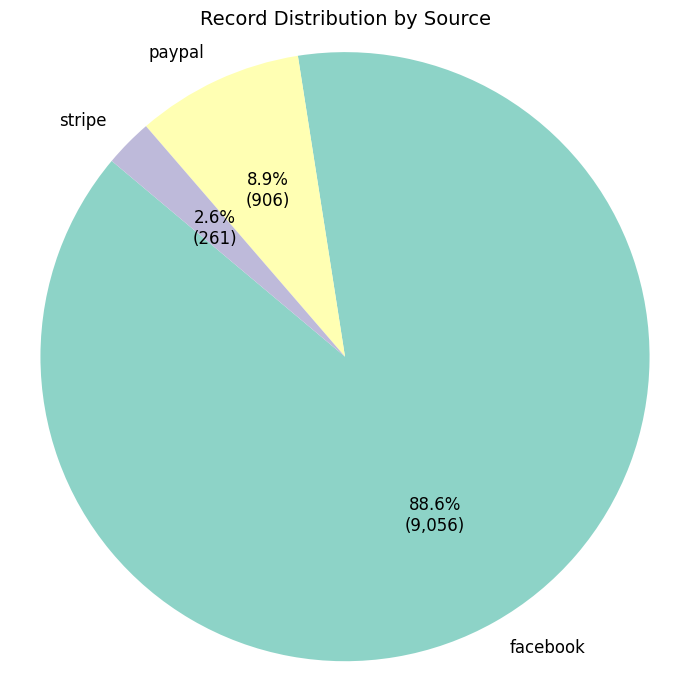

In [ ]:
import matplotlib.pyplot as plt

# Count records by source
source_counts = df_all["source"].value_counts()
labels = source_counts.index
sizes = source_counts.values

# Create labels with both count and percentage
def make_autopct(values):
    def format_pct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count:,})'
    return format_pct

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct=make_autopct(sizes),
    startangle=140,
    textprops={'fontsize': 12},
    colors=plt.cm.Set3.colors  # prettier color set
)
plt.title("Record Distribution by Source", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is round
plt.tight_layout()
plt.show()

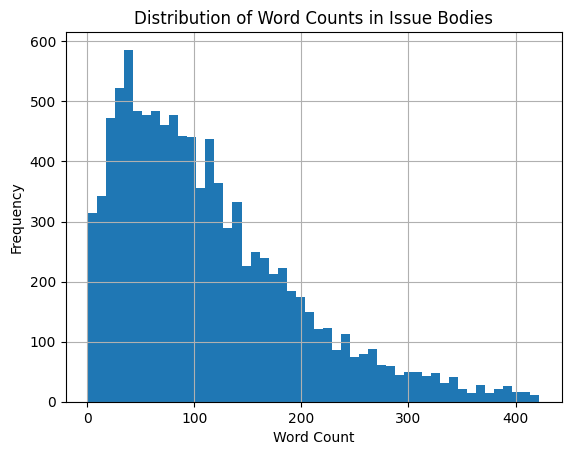

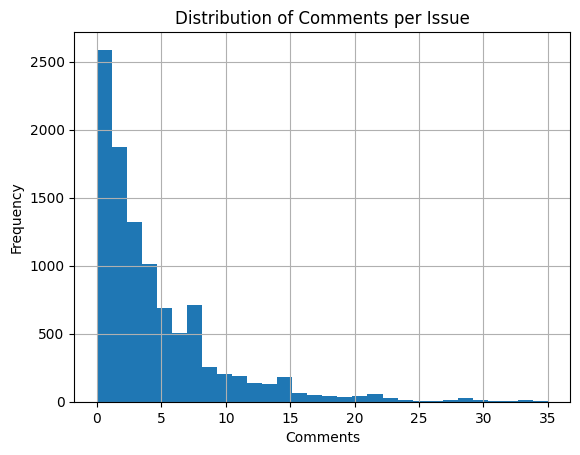

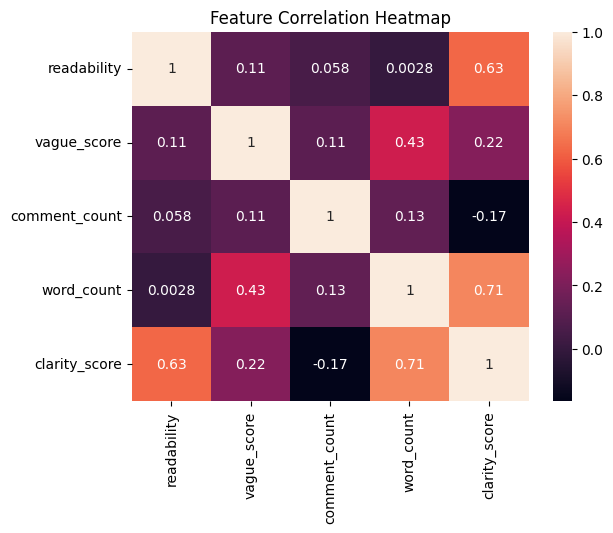

In [ ]:
import seaborn as sns

# Histogram of word count
df_all["word_count"].hist(bins=50)
plt.title("Distribution of Word Counts in Issue Bodies")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Comment count distribution
df_all["comment_count"].hist(bins=30)
plt.title("Distribution of Comments per Issue")
plt.xlabel("Comments")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
sns.heatmap(df_all[["readability", "vague_score", "comment_count", "word_count", "clarity_score"]].corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

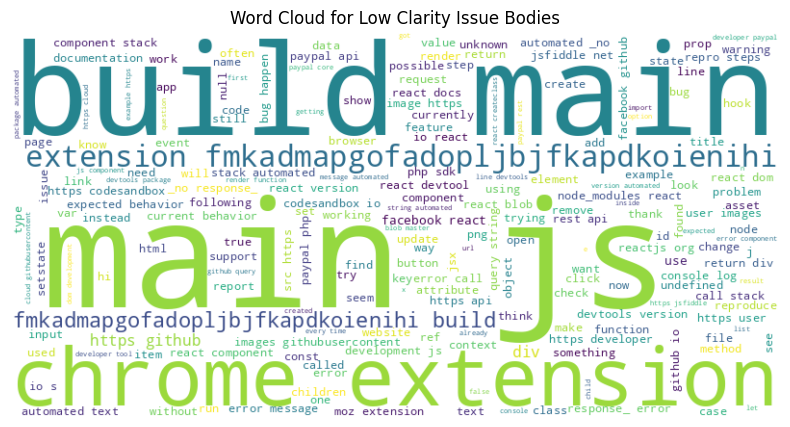

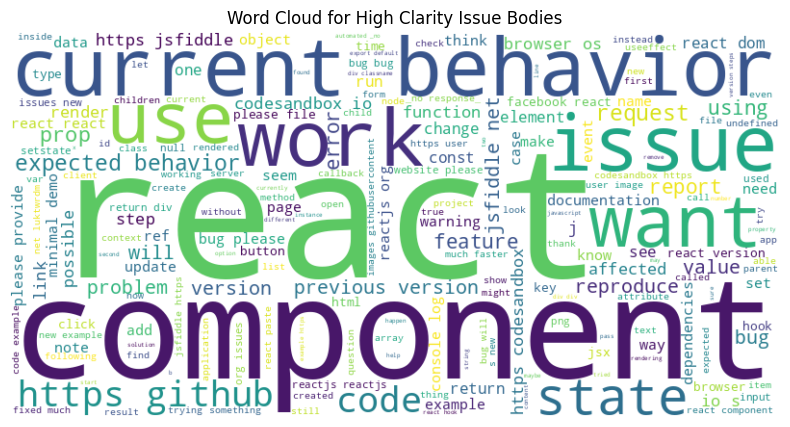

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud

# Separate data into low and high clarity based on the median
median_clarity = df_all['clarity_score'].median()
low_clarity_text = ' '.join(df_all[df_all['clarity_score'] < median_clarity]['body'].dropna().tolist())
high_clarity_text = ' '.join(df_all[df_all['clarity_score'] >= median_clarity]['body'].dropna().tolist())

# Generate word cloud for low clarity
wordcloud_low = WordCloud(width=800, height=400, background_color='white').generate(low_clarity_text)

# Plot the word cloud for low clarity
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Low Clarity Issue Bodies')
plt.show()

# Generate word cloud for high clarity
wordcloud_high = WordCloud(width=800, height=400, background_color='white').generate(high_clarity_text)

# Plot the word cloud for high clarity
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for High Clarity Issue Bodies')
plt.show()

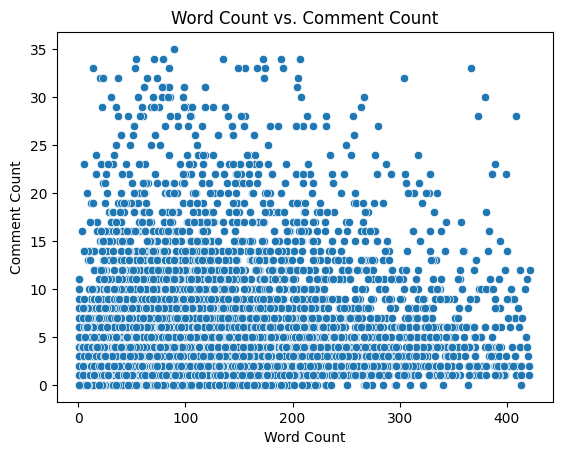

In [ ]:
sns.scatterplot(x="word_count", y="comment_count", data=df_all)
plt.title("Word Count vs. Comment Count")
plt.xlabel("Word Count")
plt.ylabel("Comment Count")
plt.show()

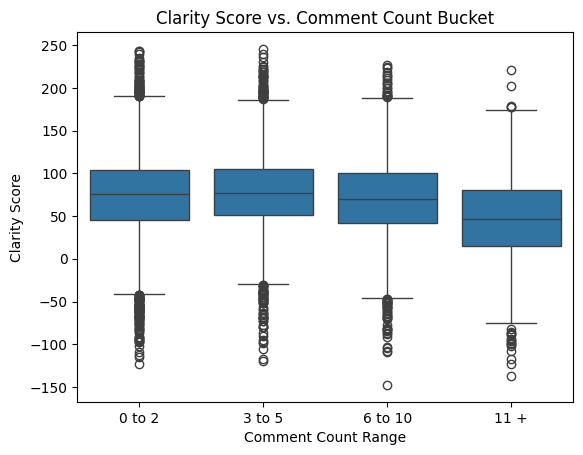

In [ ]:
df_all["comment_bucket"] = pd.cut(df_all["comment_count"], bins=[0, 2, 5, 10, 50], labels=["0 to 2", "3 to 5", "6 to 10", "11 +"])
sns.boxplot(x="comment_bucket", y="clarity_score", data=df_all)
plt.title("Clarity Score vs. Comment Count Bucket")
plt.xlabel("Comment Count Range")
plt.ylabel("Clarity Score")
plt.show()

In [ ]:
#Save Final dataframe to csv
df_all.to_csv("requirements_data.csv", index=False)